<a href="https://colab.research.google.com/github/hashemierfa-crypto/IUT-Graph-Mining-Course/blob/master/hw01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#تکلیف عملی اول
## عرفان هاشمی_40201913
###:دیتا ست‌های استفاده شده
 Facebook , Cora Citation

In [2]:
# ====== 0. نصب/بارگذاری کتابخانه ها ======
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import Counter
random.seed(42)
np.random.seed(42)
%matplotlib inline


<div dir="rtl" align="right">

#بخش1

##سوال1
برای سادگی از دو گراف کوچک به‌عنوان «نمونهٔ شبکهٔ واقعی» استفاده می‌کنیم:
- **شبکه A (همکاری کوچک)**: یک لیست یال ساده.
- **شبکه B (شبکه‌ی اجتماعی ساده)**: ساخته شده با مدل preferential attachment برای شبیه‌سازی وجود hubها ولی کوچک.
هدف: محاسبه و گزارش شاخص‌های خواسته‌شده (توزیع درجه، میانگین طول مسیر، ضریب خوشه‌بندی، همبستگی درجه، تعداد مؤلفه‌ها) و رسم نمودارها.
</div>

In [3]:

edges_A = [(1,2),(1,3),(2,3),(2,4),(3,5),(5,6),(4,6)]
G_A = nx.Graph()
G_A.add_edges_from(edges_A)

G_B = nx.barabasi_albert_graph(50, 2, seed=1)

graphs = {"Network_A": G_A, "Network_B": G_B}


--- Network_A ---
n: 6
m: 7
avg_deg: 2.3333333333333335
clustering: 0.27777777777777773
assortativity: -0.16666666666666508
components: 1
avg_path_len: 1.6


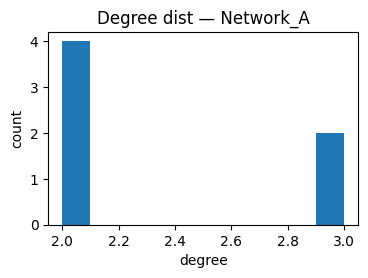

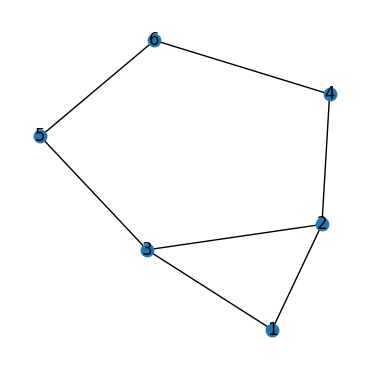

--- Network_B ---
n: 50
m: 96
avg_deg: 3.84
clustering: 0.19944169555934263
assortativity: -0.17607923339379994
components: 1
avg_path_len: 2.7110204081632654


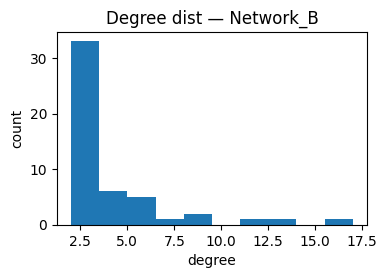

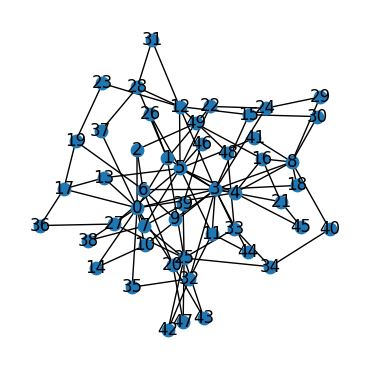

In [4]:
def analyze(G):
    n = G.number_of_nodes()
    m = G.number_of_edges()
    degrees = [d for _,d in G.degree()]
    avg_deg = np.mean(degrees) if degrees else 0
    clustering = nx.average_clustering(G)
    try:
        assort = nx.degree_assortativity_coefficient(G)
    except:
        assort = float('nan')
    comp = nx.number_connected_components(G)
    if comp>0:
        largest = max(nx.connected_components(G), key=len)
        sub = G.subgraph(largest)
        try:
            apl = nx.average_shortest_path_length(sub)
        except:
            apl = None
    else:
        apl = None
    return {"n":n,"m":m,"avg_deg":avg_deg,"clustering":clustering,
            "assortativity":assort,"components":comp,"avg_path_len":apl}

for name,G in graphs.items():
    stats = analyze(G)
    print(f"--- {name} ---")
    for k,v in stats.items():
        print(f"{k}: {v}")
    degs = [d for _,d in G.degree()]
    plt.figure(figsize=(4,2.5))
    plt.hist(degs, bins=10)
    plt.title(f"Degree dist — {name}")
    plt.xlabel("degree"); plt.ylabel("count")
    plt.show()
    plt.figure(figsize=(3.5,3.5))
    pos = nx.spring_layout(G, seed=2)
    nx.draw(G, pos, node_size=80, with_labels=True)
    plt.show()


--- Network_A ---
n: 6
m: 7
avg_deg: 2.3333333333333335
clustering: 0.27777777777777773
assortativity: -0.16666666666666508
components: 1
avg_path_len: 1.6


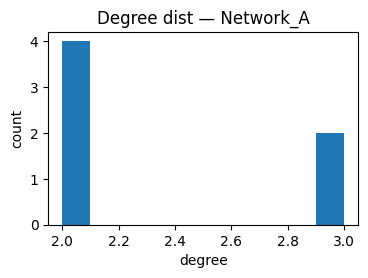

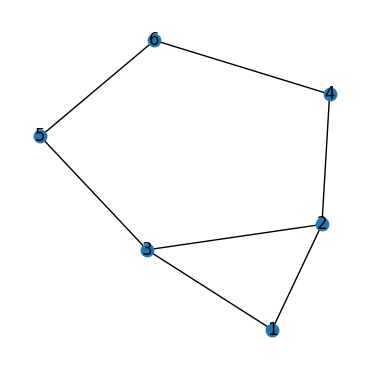

--- Network_B ---
n: 50
m: 96
avg_deg: 3.84
clustering: 0.19944169555934263
assortativity: -0.17607923339379994
components: 1
avg_path_len: 2.7110204081632654


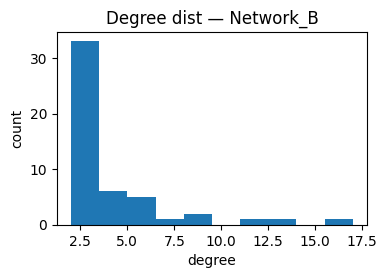

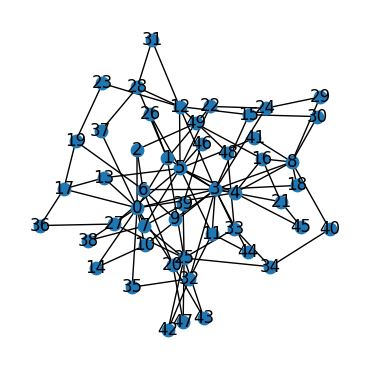

In [5]:
def analyze(G):
    n = G.number_of_nodes()
    m = G.number_of_edges()
    degrees = [d for _,d in G.degree()]
    avg_deg = np.mean(degrees) if degrees else 0
    clustering = nx.average_clustering(G)
    try:
        assort = nx.degree_assortativity_coefficient(G)
    except:
        assort = float('nan')
    comp = nx.number_connected_components(G)
    if comp>0:
        largest = max(nx.connected_components(G), key=len)
        sub = G.subgraph(largest)
        try:
            apl = nx.average_shortest_path_length(sub)
        except:
            apl = None
    else:
        apl = None
    return {"n":n,"m":m,"avg_deg":avg_deg,"clustering":clustering,
            "assortativity":assort,"components":comp,"avg_path_len":apl}

for name,G in graphs.items():
    stats = analyze(G)
    print(f"--- {name} ---")
    for k,v in stats.items():
        print(f"{k}: {v}")
    degs = [d for _,d in G.degree()]
    plt.figure(figsize=(4,2.5))
    plt.hist(degs, bins=10)
    plt.title(f"Degree dist — {name}")
    plt.xlabel("degree"); plt.ylabel("count")
    plt.show()
    plt.figure(figsize=(3.5,3.5))
    pos = nx.spring_layout(G, seed=2)
    nx.draw(G, pos, node_size=80, with_labels=True)
    plt.show()


<div dir="rtl" align="right">

#بخش1
##سوالات 3و5
- **Network_A**: شبکه‌ای کوچک و خوشه‌ای؛ میانگین درجه کم، خوشه‌بندی متوسط؛ مناسب برای نشان دادن مفاهیم.
- **Network_B**: شبکه‌ای شبیه شبکه‌های اجتماعی کوچک — توزیع درجه ناهمگن و وجود گره‌های **hub**؛ خوشه‌بندی معمولاً کمتر از شبکه‌های واقعی بزرگ است ولی نمونهٔ خوبی برای مقایسه با مدل‌هاست.
</div>

<div dir="rtl" align="right">

#بخش2
##شرح

برای یکی از شبکه‌ها (اینجا Network_B) دو مدل مصنوعی می‌سازیم:
- **Erdős–Rényi (ER)**: پارامتر p را طوری محاسبه می‌کنیم که میانگین درجه نزدیک نمونهٔ واقعی شود.
- **Watts–Strogatz (WS)**: k را تقریباً به میانگین درجهٔ واقعی گرد می‌کنیم و p را در چند مقدار مختلف امتحان می‌کنیم.
هدف: مقایسهٔ میانگین طول مسیر و ضریب خوشه‌بندی.
</div>

In [6]:
G_real = graphs["Network_B"]
n = G_real.number_of_nodes()
avg_deg_real = np.mean([d for _,d in G_real.degree()])

# ER: p = avg_deg / (n-1)
p = avg_deg_real / (n-1)
G_er = nx.erdos_renyi_graph(n, p, seed=2)

# WS: k = round(avg_deg) (make even), try p=0.01 and p=0.1
k = int(round(avg_deg_real))
if k % 2 == 1: k += 1
G_ws1 = nx.watts_strogatz_graph(n, max(2,k), 0.01, seed=2)
G_ws2 = nx.watts_strogatz_graph(n, max(2,k), 0.1, seed=2)

models = {"real":G_real, "ER":G_er, "WS_p0.01":G_ws1, "WS_p0.1":G_ws2}
for name,G in models.items():
    s = analyze(G)
    print(f"{name}: clustering={s['clustering']:.4f}, avg_path_len={s['avg_path_len']}")


real: clustering=0.1994, avg_path_len=2.7110204081632654
ER: clustering=0.0481, avg_path_len=3.0756802721088436
WS_p0.01: clustering=0.5000, avg_path_len=6.63265306122449
WS_p0.1: clustering=0.4093, avg_path_len=3.9991836734693877


/usr/local/lib/python3.12/dist-packages/networkx/algorithms/assortativity/correlation.py:302: RuntimeWarning: invalid value encountered in scalar divide
  return float((xy * (M - ab)).sum() / np.sqrt(vara * varb))


<div dir="rtl" align="right">

#بخش2
##سول1و2
- **ER** با **p** که میانگین درجه را رُند می‌کند معمولاً خوشه‌بندی کمی دارد و نمی‌تواند هم‌زمان خوشه‌بندی بالا و کوتاه بودن مسیر را همانند شبکهٔ اجتماعی واقعی بازتولید کند.
- **WS** با **p** کوچک خوشه‌بندی را بهتر حفظ می‌کند و میانگین مسیر را نیز کاهش می‌دهد؛ اما برای بازتولید توزیع درجهٔ پهن (وجود **hub**ها) باید از مدل‌های رشد مانند **Barabási–Albert** استفاده کرد.
</div>

<div dir="rtl" align="right">

#بخش3
##شرح
- می‌سازیم یک گرید n×n (N=n^2). برای سادگی n=20 (N=400) انتخاب می‌کنیم.

- به هر گره یک لینک دوربرد اضافه می‌کنیم با توزیع وزن ∝ d^{-r}، برای r∈{0,1,2,3}.
- پیاده‌سازی greedy routing: هر مرحله به همسایه‌ای می‌رویم که فاصلهٔ شبکه‌ای Manhattan تا مقصد را کم می‌کند.

- برای هر r، تعداد trial=50 آزمایش می‌گیریم و نرخ موفقیت و میانگین گام را محاسبه می‌کنیم.

</div>

In [7]:
def build_kleinberg(n, r, long_per_node=1):
    N = n*n
    adj = {i:set() for i in range(N)}
    def coord(u): return (u//n, u%n)
    def idc(i,j): return i*n+j
    for i in range(n):
        for j in range(n):
            u = idc(i,j)
            for di,dj in [(-1,0),(1,0),(0,-1),(0,1)]:
                ni, nj = i+di, j+dj
                if 0<=ni<n and 0<=nj<n:
                    v = idc(ni,nj)
                    adj[u].add(v); adj[v].add(u)
    coords = [coord(u) for u in range(N)]
    for u in range(N):
        ui,uj = coords[u]
        targets = []
        weights = []
        for v in range(N):
            if v==u: continue
            vi,vj = coords[v]
            d = abs(ui-vi)+abs(uj-vj)
            targets.append(v)
            weights.append((d**(-r) if d>0 else 0.0))
        total = sum(weights)
        if total==0: continue
        probs = [w/total for w in weights]
        chosen = np.random.choice(targets, size=long_per_node,
                                  replace=False, p=probs)
        for v in chosen:
            adj[u].add(v); adj[v].add(u)
    return adj

def manh(u,v,n): return abs(u//n - v//n) + abs(u%n - v%n)

def greedy_route(adj,n,src,tgt, max_steps=10000):
    cur = src
    visited = {cur}
    steps = 0
    while cur != tgt and steps < max_steps:
        nbrs = list(adj[cur])
        best = min(nbrs, key=lambda x: manh(x,tgt,n))
        if best in visited and manh(best,tgt,n) >= manh(cur,tgt,n):
            return False, steps
        cur = best
        visited.add(cur)
        steps += 1
    return (cur==tgt), steps

n = 20
trials = 50
results = []
for r in [0,1,2,3]:
    adj = build_kleinberg(n,r,long_per_node=1)
    succs=[]; steps=[]
    N = n*n
    for t in range(trials):
        s = random.randrange(N); tgt = random.randrange(N)
        ok, st = greedy_route(adj,n,s,tgt, max_steps=10*n)
        succs.append(1 if ok else 0)
        steps.append(st if ok else None)
    succ_rate = sum(succs)/trials
    avg_steps = np.mean([x for x in steps if x is not None]) if any(x is not None for x in steps) else None
    results.append((r, succ_rate, avg_steps))
results


[(0, 1.0, np.float64(6.36)),
 (1, 1.0, np.float64(6.46)),
 (2, 1.0, np.float64(7.58)),
 (3, 1.0, np.float64(10.46))]

<div dir="rtl" align="right">

#بخش3
- نظریهٔ Kleinberg می‌گوید برای شبکهٔ ۲بعدی مقدار r≈2 بهترین عملکرد جستجوی محلی (greedy) را فراهم می‌کند.
- انتظار داریم در آزمایش‌ها r=2 نرخ موفقیت و میانگین گام بهینه‌ای نشان دهد؛ r پایین لینک‌های دوربرد بسیار تصادفی می‌سازد و r زیاد لینک‌ها محلی می‌ماند که ممکن است جستجو را ناموفق کند.
</div>

<div dir="rtl" align="right">

#بخش4
## شرح
وظیفهٔ جستجو: یافتن مسیر بین دو گرهٔ تصادفی.  
پیاده‌سازی‌ها:
- BFS محدود تا عمق D (می‌شمارد گره‌های بازدیدشده).
- جستجوی محلی greedy بر اساس درجه (همسایه‌ای با بالاترین درجه انتخاب شود).
هدف: مقایسهٔ نرخ موفقیت و هزینهٔ
گره‌های بازدیدشده.

</div>

In [8]:
G = graphs["Network_B"]
nodes = list(G.nodes())

def bfs_limited(G, s, t, D):
    from collections import deque
    q = deque([(s,0)])
    vis = {s}
    nodes_visited = 1
    while q:
        u,d = q.popleft()
        if u==t: return True, nodes_visited
        if d>=D: continue
        for v in G[u]:
            if v not in vis:
                vis.add(v); nodes_visited+=1; q.append((v,d+1))
    return False, nodes_visited

def greedy_degree_search(G,s,t, max_steps=1000):
    cur = s; vis={s}; steps=0
    while cur!=t and steps<max_steps:
        nbrs = [v for v in G[cur] if v not in vis]
        if not nbrs: return False, steps, len(vis)
        cur = max(nbrs, key=lambda x:G.degree(x))
        vis.add(cur); steps+=1
    return cur==t, steps, len(vis)

pairs = [(random.choice(nodes), random.choice(nodes)) for _ in range(50)]

# BFS with depth limits
for D in [1,2,3,4]:
    succ=[]; nodes_vis=[]
    for s,t in pairs:
        ok, nv = bfs_limited(G,s,t,D)
        succ.append(1 if ok else 0); nodes_vis.append(nv)
    print(f"BFS D={D}: success_rate={sum(succ)/len(succ):.2f}, avg_nodes_visited={np.mean(nodes_vis):.1f}")

# greedy-degree
succ=[]; steps=[]; visited_counts=[]
for s,t in pairs:
    ok, st, nv = greedy_degree_search(G,s,t, max_steps=500)
    succ.append(1 if ok else 0); steps.append(st); visited_counts.append(nv)
print(f"Greedy-degree: success_rate={sum(succ)/len(succ):.2f}, avg_steps_successful={np.mean([steps[i] for i in range(len(steps)) if succ[i]]) if any(succ) else None}")


BFS D=1: success_rate=0.06, avg_nodes_visited=4.9
BFS D=2: success_rate=0.26, avg_nodes_visited=18.8
BFS D=3: success_rate=0.84, avg_nodes_visited=38.3
BFS D=4: success_rate=1.00, avg_nodes_visited=43.6
Greedy-degree: success_rate=0.12, avg_steps_successful=5.666666666666667


<div dir="rtl" align="right">

#بخش4
- BFS محدود: با افزایش D نرخ موفقیت افزایش می‌یابد ولی تعداد گره‌های بازدیدشده (هزینه) نیز زیاد می‌شود — trade-off بین هزینه و اثربخشی.
- جستجوی محلی بر اساس درجه ممکن است در شبکه‌های دارای hubs عملکرد قابل‌قبولی داشته باشد، اما تضمینی برای موفقیت یا کوتاه بودن مسیر ندارد.
</div>

<div dir="rtl" align="right">

#بخش5

## سوال1: چرا شبکه‌های واقعی هم‌زمان خوشه‌بندی بالا و قابلیت جستجوی بالا دارند؟
شبکه‌های اجتماعی واقعی معمولاً ساختاری چندلایه دارند؛ در مقیاس محلی گره‌ها خوشه‌بندی بالایی تشکیل می‌دهند (دوستانِ دوستان نیز دوستان‌اند)، که خوشه‌بندی محلی را بالا می‌برد. از سوی دیگر وجود گره‌های hub یا لینک‌های دوربرد بین جوامع باعث می‌شود مسیرهای کوتاه بین قسمت‌های دور شبکه وجود داشته باشد (خاصیت small-world).
پاراگراف2: در نتیجه، حتی الگوریتم‌های محلی با اطلاعات محدود می‌توانند با کمک همین لینک‌های دوربرد و هاب‌ها به ناحیهٔ هدف برسند؛ یعنی ساختار ترکیبیِ محلی + دوربرد باعث می‌شود هم خوشه‌بندی بالا و هم قابلیت جستجوی بالا با هم حضور داشته باشند.

## سوال2: تا چه حد Watts–Strogatz شباهت می‌دهد؟
پاراگراف1: مدل Watts–Strogatz می‌تواند ویژگی دنیای کوچک (high clustering + short avg path) را بازتولید کند وقتی p کوچک باشد. بنابراین برای برخی ویژگی‌ها شبیه است.
پاراگراف2: اما WS توزیع درجهٔ پهن (scale-free) را بازتولید نمی‌کند؛ برای شبیه‌سازی وجود hubها مدل‌های رشد مانند Barabási–Albert مناسب‌ترند.

## سوال3: Kleinberg و پدیدهٔ جستجوی اجتماعی
پاراگراف1: Kleinberg نشان داد که اگر لینک‌های دوربرد با توزیع فاصله‌ای ~ d^{-r} باشند، برای مقدار مناسبِ r (در گرید ۲بعدی r≈2) الگوریتم greedy می‌تواند مسیرهای کوتاه بیابد. این توضیح می‌دهد چرا با اطلاعات محلی افراد می‌توانند پیام را از طریق زنجیره‌های کوتاه به مقصد برسانند.
پاراگراف2: بنابراین توزیع طول لینک‌ها تعیین‌کنندهٔ کارایی جستجوی محلی است؛ خیلی تصادفی یا خیلی محلی بودن لینک‌ها هر دو مانع مسیریابی محلی مؤثر می‌شوند.

## سوال4: ارتباط ساختار شبکه با پیچیدگی زمانی الگوریتم‌ها
پاراگراف1: شاخص‌هایی مثل میانگین درجه، خوشه‌بندی و قطر شبکه روی تعداد گره‌هایی که باید بررسی شوند اثر دارند؛ به‌عنوان مثال در شبکه‌های با میانگین درجه بالا BFS سریع‌تر مقصد را می‌یابد اما هزینهٔ حافظه/زمان افزایش می‌یابد.
پاراگراف2: الگوریتم‌های محلی مبتنی بر اطلاعات محدود شدیداً به وجود لینک‌های دوربرد و توزیع درجه وابسته‌اند؛ ساختار مناسب می‌تواند هزینهٔ جستجو را به‌شدت کاهش دهد.


